In [2]:
from pytrends.request import TrendReq
import pandas as pd
import time

# TrendReq を初期化（hl: 言語、tz: タイムゾーン）
pytrends = TrendReq(hl='ja-JP', tz=360)

# 検索するキーワードのリスト
kw_list = ["ファッション", "古着"]

# データの取得期間、地域などのパラメータを設定
pytrends.build_payload(kw_list, cat=0, timeframe='2021-01-01 today', geo='JP')

def get_interest_over_time_with_retry(pytrends, retries=5, sleep_time=60):
    """interest_over_time() の取得をリトライする関数"""
    for i in range(retries):
        try:
            data = pytrends.interest_over_time()
            return data
        except Exception as e:
            print(f"[{i+1}/{retries}] エラー発生: {e}")
            print(f"{sleep_time}秒待機して再試行します...")
            time.sleep(sleep_time)
    raise Exception("interest_over_time の取得に失敗しました。")

def get_related_queries_with_retry(pytrends, retries=5, sleep_time=60):
    """related_queries() の取得をリトライする関数"""
    for i in range(retries):
        try:
            related_queries = pytrends.related_queries()
            return related_queries
        except Exception as e:
            print(f"[{i+1}/{retries}] 関連クエリ取得エラー: {e}")
            print(f"{sleep_time}秒待機して再試行します...")
            time.sleep(sleep_time)
    raise Exception("related_queries の取得に失敗しました。")

# interest_over_time のデータを取得
data = get_interest_over_time_with_retry(pytrends)
print("Interest Over Time:")
print(data)

# 関連クエリのデータを取得
related_queries = get_related_queries_with_retry(pytrends)
print("Related Queries:")
print(related_queries)


/usr/local/lib/python3.9/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Interest Over Time:
            ファッション  古着  isPartial
date                             
2024-02-25      86  42      False
2024-03-03      88  44      False
2024-03-10      87  42      False
2024-03-17      88  46      False
2024-03-24      92  46      False
2024-03-31      90  41      False
2024-04-07      94  46      False
2024-04-14      96  48      False
2024-04-21      87  47      False
2024-04-28      94  59      False
2024-05-05      86  45      False
2024-05-12      88  41      False
2024-05-19      89  36      False
2024-05-26      89  41      False
2024-06-02      87  42      False
2024-06-09      92  39      False
2024-06-16      90  41      False
2024-06-23      88  41      False
2024-06-30      87  34      False
2024-07-07      86  38      False
2024-07-14      84  37      False
2024-07-21      84  34      False
2024-07-28      77  35      False
2024-08-04      80  35      False
2024-08-11      80  46      False
2024-08-18      78  38      False
2024-08-25      83  37      

KeyboardInterrupt: 

In [5]:
from pytrends.request import TrendReq
import pandas as pd
import time
from datetime import datetime

# TrendReq を初期化（hl: 言語、tz: タイムゾーン）
pytrends = TrendReq(hl='ja-JP', tz=360)

# 検索するキーワードのリスト
kw_list = ["ファッション", "古着"]

# 今日の日付を 'YYYY-MM-DD' 形式で取得
today = datetime.today().strftime('%Y-%m-%d')

# 期間を正しい形式で指定（例：2021-01-01 から今日まで）
timeframe = f"2021-01-01 {today}"

# データの取得期間、地域などのパラメータを設定
pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='JP')

# 以下、リトライ処理などはそのまま
def get_interest_over_time_with_retry(pytrends, retries=5, sleep_time=60):
    """interest_over_time() の取得をリトライする関数"""
    for i in range(retries):
        try:
            data = pytrends.interest_over_time()
            return data
        except Exception as e:
            print(f"[{i+1}/{retries}] エラー発生: {e}")
            print(f"{sleep_time}秒待機して再試行します...")
            time.sleep(sleep_time)
    raise Exception("interest_over_time の取得に失敗しました。")

def get_related_queries_with_retry(pytrends, retries=5, sleep_time=60):
    """related_queries() の取得をリトライする関数"""
    for i in range(retries):
        try:
            related_queries = pytrends.related_queries()
            return related_queries
        except Exception as e:
            print(f"[{i+1}/{retries}] 関連クエリ取得エラー: {e}")
            print(f"{sleep_time}秒待機して再試行します...")
            time.sleep(sleep_time)
    raise Exception("related_queries の取得に失敗しました。")

# interest_over_time のデータを取得
data = get_interest_over_time_with_retry(pytrends)
print("Interest Over Time:")
print(data)

# 関連クエリのデータを取得
related_queries = get_related_queries_with_retry(pytrends)
print("Related Queries:")
print(related_queries)


/usr/local/lib/python3.9/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Interest Over Time:
            ファッション  古着  isPartial
date                             
2020-12-27      79  34      False
2021-01-03      67  29      False
2021-01-10      68  26      False
2021-01-17      75  24      False
2021-01-24      67  26      False
...            ...  ..        ...
2025-01-26      45  24      False
2025-02-02      47  25      False
2025-02-09      47  26      False
2025-02-16      48  28      False
2025-02-23      49  29       True

[218 rows x 3 columns]
[1/5] 関連クエリ取得エラー: list index out of range
60秒待機して再試行します...
[2/5] 関連クエリ取得エラー: list index out of range
60秒待機して再試行します...
[3/5] 関連クエリ取得エラー: list index out of range
60秒待機して再試行します...
[4/5] 関連クエリ取得エラー: list index out of range
60秒待機して再試行します...
[5/5] 関連クエリ取得エラー: list index out of range
60秒待機して再試行します...


Exception: related_queries の取得に失敗しました。

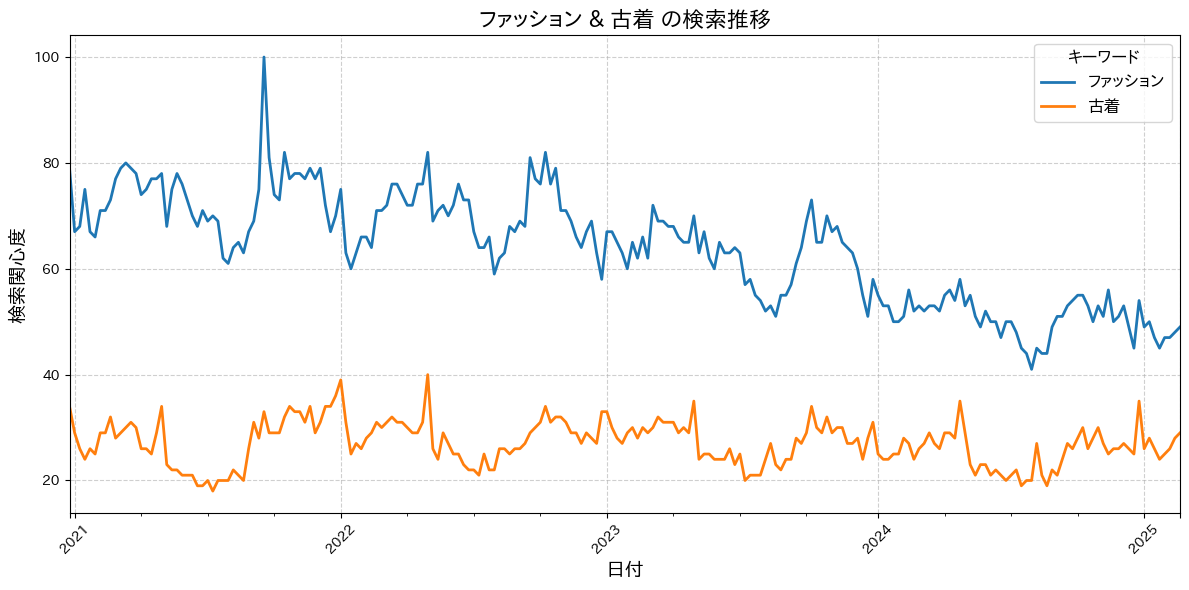

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# フォントファイルのパス
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
# フォントを登録
fm.fontManager.addfont(font_path)
# 登録したフォントの名前を取得
font_prop = fm.FontProperties(fname=font_path)
# フォント名を rcParams に設定
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 以下、プロットのコード
data.plot(figsize=(12, 6), linewidth=2)
plt.title("ファッション & 古着 の検索推移", fontsize=16)
plt.xlabel("日付", fontsize=14)
plt.ylabel("検索関心度", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="キーワード", fontsize=12, title_fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
